1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Getting the Data 
We can generate a function here to get the data from various sources. Here I choose github raw file for easy loading 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pbirthal/DataScience-Portfolio/main/Project_6_Housing_california/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In our dataset, there are 10 features with 20640 rows ,all the features are in numerical as float, one feature is categorical

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Before exploring the data, a function is created to save the figures from this project into a new folder named Images

In [5]:
import os 

In [6]:
images = 'images'
os.mkdir(images)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'images'

In [7]:
image_path = os.path.join(os.getcwd(),images)

In [22]:
def save_fig(fig_id, tight_layout = True, fig_extension= 'png', resolution =300): 
    path = os.path.join(image_path,f'{fig_id}.{fig_extension}')
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)
    

In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We hav missing values in the column 'Total Bedrooms'. Let take a look at that col.

In [10]:
df[df.total_bedrooms.isnull()] # Here we can either drop the null values or replace it with the median.
null_rows = df.isnull().any(axis=1)

In [11]:
df[null_rows]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [12]:
# Lets drop those values and make this as option 1
df_opt1 = df.copy()
df_opt1.dropna(subset=['total_bedrooms'], inplace=True)
df_opt1.loc[null_rows]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [13]:
# Lets replace these values with the median and use it as option 2
df_opt2 = df.copy()
df_opt2.fillna(df['total_bedrooms'].median(),inplace=True)
df_opt2.loc[null_rows]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,435.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,435.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,435.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,435.0,2734.0,814.0,6.6073,258100.0,<1H OCEAN


So here in cell above , Nan values are replaced by the median value of 435

#### EDA


In [14]:
# Lets take a look at the distribution of the data
import seaborn as sns


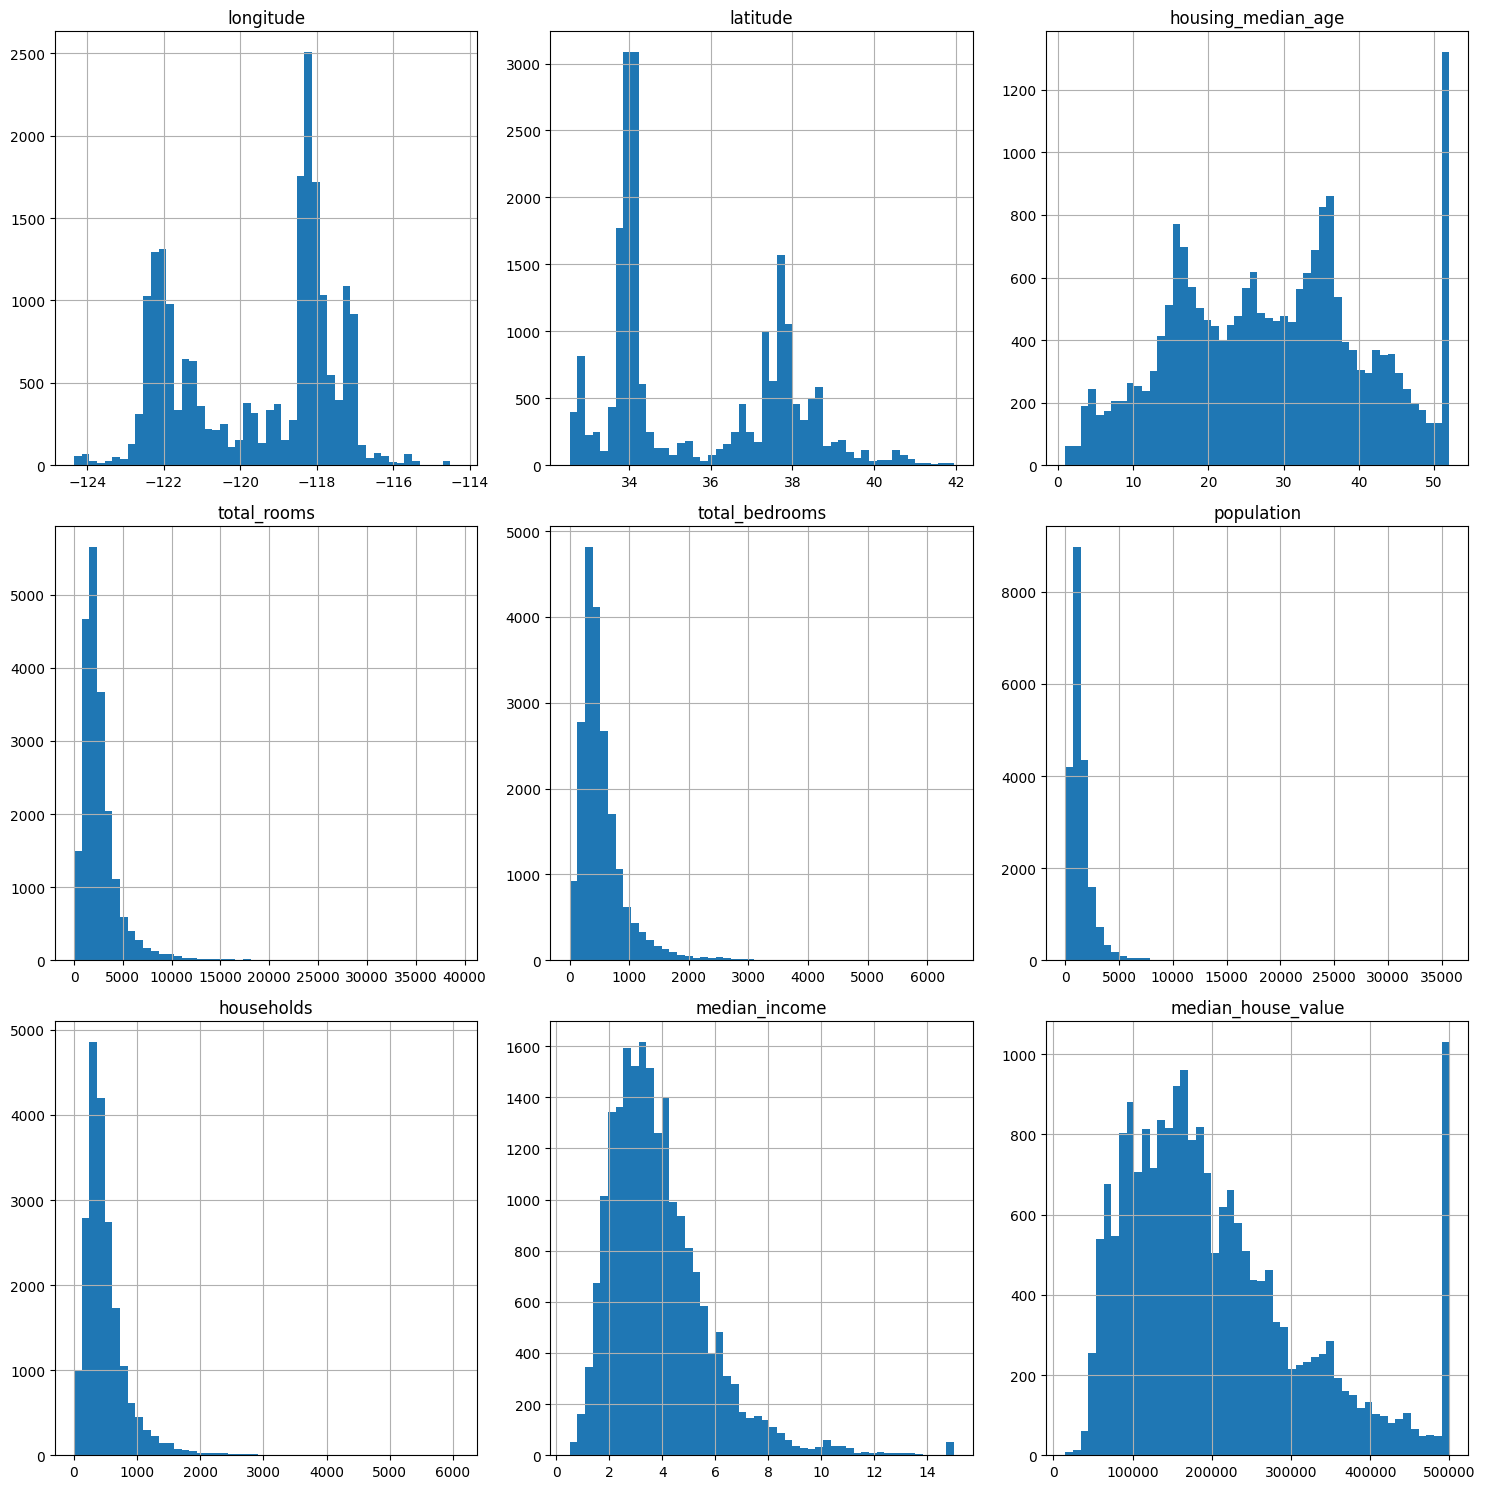

In [23]:
df.hist(bins = 50 , figsize=((15,15)))
save_fig('histogram_plot_rawdata')

Before moving further, on analysing the above plot, we conclude that
1. median_house_value and housing_median_age have values capped. that is why there is a big spike in end. this is not an outlier.
2. median_income have their values also scaled( 2 means 20000USD p.a.) 
3. most of the features are right skewed.

<Axes: xlabel='ocean_proximity'>

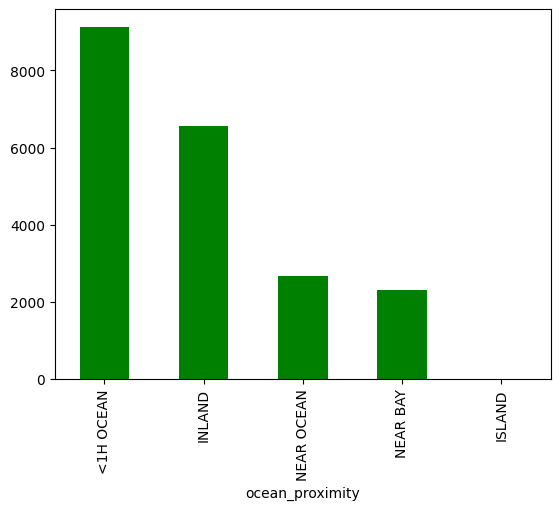

In [33]:
df.ocean_proximity.value_counts().plot(kind= 'bar',color = 'green')

#### Splitting the data into test and training 

#### Option 1 - Custom Fx using numpy

In [46]:
# From hereon I will take df_opt2 and split the data from here. The split data will be further used in evaluation against model to avoid data snooping bias.
#np.random.permutation(9) # this will shuffle the data indices provide (if list then elements of list, if number then numbers till the digit)
#Option1 - Using random method for splitting the data 

def shuffle_split_data(data, test_ratio): 
    shuffled_indices = np.random.permutation(len(data))
    test_len = int(len(data)*test_ratio) # no float value reqd
    test_indices = shuffled_indices[:test_len]
    train_indices = shuffled_indices[test_len:]
    return data.iloc[test_indices], data.iloc[train_indices] 

In [48]:
test_data, train_data = shuffle_split_data(df_opt2, 0.15)

In [51]:
len(test_data) ,len(train_data) # Here we can see that data is split in test ratio size of 0.15

(3096, 17544)

#### Option 2 Using sklearn - train_test_split

In [61]:
# Option 2 Using sklearn - train_test_split
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(df_opt2, test_size = 0.15, random_state= 42) # Random seed is given to fix the data,it should not randomize each time we run the model or program
len(test_set), len(train_set)

(3096, 17544)

#### Option 3 Using sklearn train_test_split with stratify 

In [67]:
# One thing to consider here is that feature you want to give into stratify will be binned or categorical . Numerical will give error. 
# X, y if we ae using y as labels or targets , we can give stratify= y
# we will use pd.cut fx here to bin our data 

# Based on Income category

df_opt2['income_cat'] = pd.cut(df_opt2['median_income'], bins = [0,1.5,3.0,4.5,6.0,np.inf],labels = [1,2,3,4,5])
df_opt2.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [88]:
train_set , test_set = train_test_split(df_opt2, test_size=0.2, random_state=42 , stratify=df_opt2['income_cat'])
len(test_set), len(train_set)

(4128, 16512)

In [71]:
df_opt2['house_age'] = pd.cut(df_opt2['housing_median_age'], bins = [0,10,20,30,40,50,np.inf] , labels=['Very New','New', 'Okay','Old', 'Needs renovation','Very Old' ])
df_opt2.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,house_age
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,Needs renovation
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,Okay


In [72]:
train_set, test_set = train_test_split(df_opt2, test_size=0.15, stratify=df_opt2['house_age'], random_state=42)
len(test_set), len(train_set)

(3096, 17544)

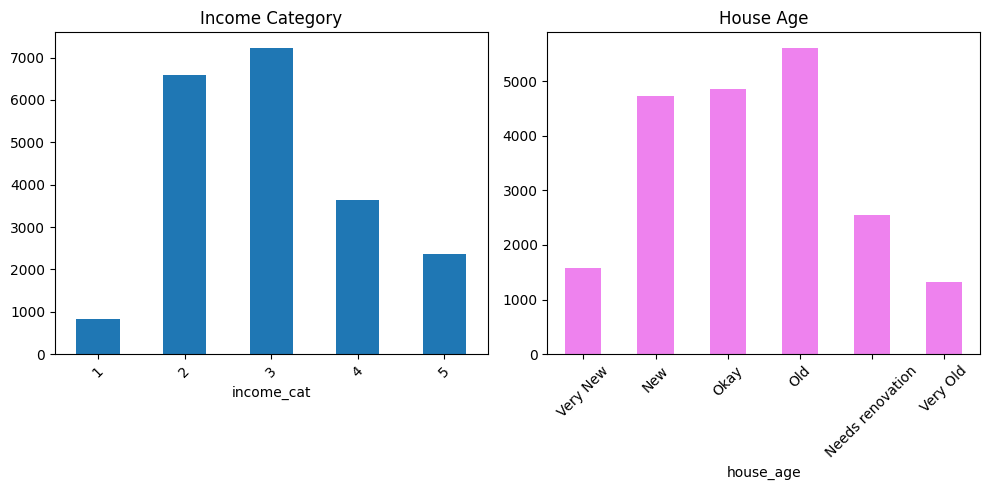

In [87]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Income Category')
df_opt2['income_cat'].value_counts().sort_index().plot(kind = 'bar', rot=45)
plt.subplot(1,2,2)
plt.title('House Age')
df_opt2['house_age'].value_counts().sort_index().plot(kind = 'bar', rot =45 , color = 'violet')
save_fig('Income and House Age grouped')

In [92]:
# Lets drop these custom cols from the test and train set as we dont require this now after stratified sampling 

for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    set_.drop("house_age", axis=1, inplace=True)

In [95]:
housing = train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


<Axes: xlabel='longitude', ylabel='latitude'>

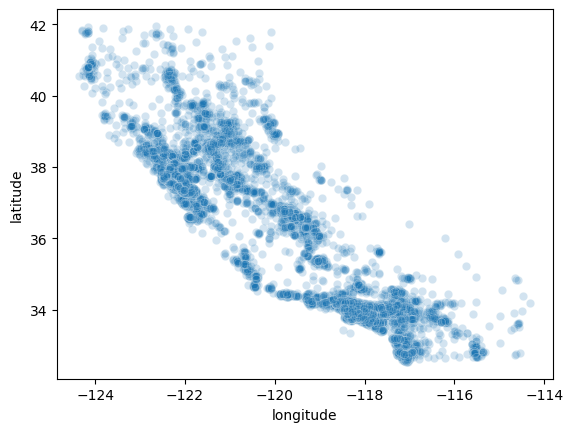

In [98]:

sns.scatterplot(x='longitude', y ='latitude', data= housing)